# Online Learning Demonstration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import olac

import warnings


In [12]:
warnings.filterwarnings('ignore')

In [3]:
% load_ext autoreload
% autoreload 2
% matplotlib inline


In [4]:
plt.rcParams['figure.figsize'] = (12,5,)

In [21]:
balls_stream = olac.data_generators.roving_balls(steps=0, period=25000, balls=2)
balls_stream = olac.data_generators.

In [45]:
# http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

clfs = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}


In [46]:
gridpoints = np.linspace(-10,10,250)
grid = []
for y in gridpoints:
    for x in gridpoints:
        grid.append([x,y])
        
grid = np.array(grid)


In [47]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures
transformer = RBFSampler(n_components=100, gamma=0.075)
# transformer = PolynomialFeatures(degree=5)
gridt = transformer.fit_transform(grid)

In [57]:
clf = MLPClassifier((64,32,), batch_size=1, learning_rate='adaptive', early_stopping=False, 
                    alpha=0.0003, warm_start=False)
# clf = PassiveAggressiveClassifier()
# clf = Perceptron()
# clf = SGDClassifier()

In [58]:
label_frac = 0.1

AttributeError: 'MLPClassifier' object has no attribute 'decision_function'

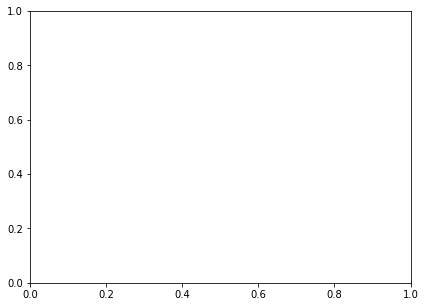

In [59]:
test = []
train = []
pred_test = []
pred_train = []
accs = []

frame = 0

window = 200

acc_report_step = 25#int(5/label_frac)
last_report = -1

n_labels = 500000 / acc_report_step

for row in balls_stream:
    x = row[:-1].reshape(1,-1)
    y = row[-1].reshape(-1)
    
    xt = transformer.transform(x)
    
    if np.random.uniform() < label_frac:
        train.append(row)
        clf.partial_fit(xt, y, classes=[0,1])
        pred_train.append(clf.predict(xt))
        show = True
        
    elif len(train)>0:  # don't predict without fitting
        pred_test.append(clf.predict(xt))
        test.append(row)
        
    if (len(train)%acc_report_step == 0) and len(train) != last_report:
        last_report = len(train)
        test_arr = np.array(test)
        try:
            X_test = test_arr[:, :-1]  
            y_test = test_arr[:,-1].reshape(-1)
            y_test_pred = np.array(pred_test).reshape(-1)
        except:
            continue
    
        acc = np.mean(y_test == y_test_pred)
        accs.append(acc)

        plt.figure(figsize=(15,5))
        plt.subplot(121)
        
        try:
            Z = clf.predict_proba(gridt)[:,0].reshape(len(gridpoints), len(gridpoints))
            line = 0.5
        except:
            Z = clf.decision_function(gridt)[:].reshape(len(gridpoints), len(gridpoints))
            line = 0
        
        plt.contourf(gridpoints, gridpoints, Z, 10)
        
        plt.contour(gridpoints, gridpoints, Z, [line], colors=['r'], linewidths=2)
        plt.scatter(X_test[-window:,0], X_test[-window:,1], c=y_test[-window:])
        plt.colorbar()

        wrong = (y_test != y_test_pred)[-window:]
        plt.scatter(X_test[-window:,0][wrong], X_test[-window:,1][wrong], c='r')
        plt.title(f'Decision boundary ({label_frac:.0%} labelled)')

        plt.subplot(122)
        plt.plot(acc_report_step*np.arange(0,len(accs)), 
                 pd.Series(accs).rolling(acc_report_step, min_periods=0).mean())
        plt.ylim([-0.05,1.05])
        plt.xlabel('Training samples')
        plt.title(f'Rolling Accuracy ({window} samples)')
        
        frame += 1
        
        plt.savefig(f'img/frame{frame}.png')

        plt.show()

        print(f'Overall after {len(train)} training examples: {acc:.4f}')
        display.clear_output(wait=True)
    
    if len(train) == n_labels:
        break
    
        
test_arr = np.array(test)
X_test = test_arr[:,:-1]  
y_test = test_arr[:,-1].reshape(-1)
y_test_pred = np.array(pred_test).reshape(-1)

train_arr = np.array(train)
X_train = train_arr[:,:-1]  
y_train = train_arr[:,-1].reshape(-1)
y_train_pred = np.array(pred_train).reshape(-1)



    
    

In [70]:
import imageio

In [65]:
import glob
import os

In [68]:
images = []
i = 1
while os.path.isfile(f'img/frame{i}.png'):
    images.append(f'img/frame{i}.png')
    i += 1
images

['img/frame1.png',
 'img/frame2.png',
 'img/frame3.png',
 'img/frame4.png',
 'img/frame5.png',
 'img/frame6.png',
 'img/frame7.png',
 'img/frame8.png',
 'img/frame9.png',
 'img/frame10.png',
 'img/frame11.png',
 'img/frame12.png',
 'img/frame13.png',
 'img/frame14.png',
 'img/frame15.png',
 'img/frame16.png',
 'img/frame17.png',
 'img/frame18.png',
 'img/frame19.png',
 'img/frame20.png',
 'img/frame21.png',
 'img/frame22.png',
 'img/frame23.png',
 'img/frame24.png',
 'img/frame25.png',
 'img/frame26.png',
 'img/frame27.png',
 'img/frame28.png',
 'img/frame29.png',
 'img/frame30.png',
 'img/frame31.png',
 'img/frame32.png',
 'img/frame33.png',
 'img/frame34.png',
 'img/frame35.png',
 'img/frame36.png',
 'img/frame37.png',
 'img/frame38.png',
 'img/frame39.png',
 'img/frame40.png',
 'img/frame41.png',
 'img/frame42.png',
 'img/frame43.png',
 'img/frame44.png',
 'img/frame45.png',
 'img/frame46.png',
 'img/frame47.png',
 'img/frame48.png',
 'img/frame49.png',
 'img/frame50.png',
 'img/fra

In [75]:
!mkdir img/gifs

In [77]:
imageio.mimsave('img/gifs/onlineMLP.gif', [imageio.imread(f) for f in images])

![lol]('img/gifs/onlineMLP.gif')

In [80]:
!ls img/gifs

onlineMLP.gif


In [23]:
Z.shape

(62500, 2)

In [11]:
s = pd.Series(accs)

In [81]:
s.

0      0.500000
1      0.450000
2      0.453846
3      0.455769
4      0.464615
5      0.466127
6      0.467206
7      0.468329
8      0.471848
9      0.474664
10     0.476967
11     0.478886
12     0.482049
13     0.486078
14     0.490710
15     0.494763
16     0.500261
17     0.505538
18     0.510259
19     0.515428
20     0.523512
21     0.530019
22     0.535485
23     0.540347
24     0.545019
25     0.550210
26     0.555173
27     0.560210
28     0.565158
29     0.569897
         ...   
75     0.703301
76     0.705184
77     0.707052
78     0.708872
79     0.710677
80     0.712437
81     0.714154
82     0.715859
83     0.717522
84     0.719147
85     0.720777
86     0.722371
87     0.723960
88     0.725529
89     0.727064
90     0.728572
91     0.730048
92     0.731506
93     0.732941
94     0.734345
95     0.735726
96     0.737093
97     0.738458
98     0.739837
99     0.741188
100    0.744938
101    0.749733
102    0.753923
103    0.758201
104    0.762095
Length: 105, dtype: floa

In [46]:
transformer.transform(x)

array([[-0.00778199,  0.1413258 , -0.12673852,  0.12537049,  0.13572388,
        -0.08995507, -0.06533778,  0.12350949, -0.10749939, -0.13752274,
         0.12275947,  0.0167736 ,  0.13211687, -0.0303612 ,  0.06613316,
         0.10658022, -0.00830164,  0.09362645,  0.14049948,  0.12144931,
         0.08763538,  0.07381036,  0.06017905,  0.11380782, -0.06672052,
         0.1151827 , -0.10351163,  0.14014452,  0.13948461, -0.03899365,
        -0.06809666,  0.00439565,  0.01478309,  0.10486163, -0.12610852,
        -0.1152629 ,  0.08680367,  0.04365073,  0.13828848, -0.10860146,
         0.04443453, -0.04929689, -0.13139762,  0.08185442,  0.10540077,
        -0.11238543, -0.13551838,  0.14138757, -0.04201885,  0.1306314 ,
        -0.13203496,  0.13907976,  0.14111207,  0.07114427, -0.13922606,
        -0.03346018, -0.14066472, -0.09711112,  0.03458586,  0.09951431,
         0.1163547 , -0.13300923, -0.12726572,  0.13855436, -0.13913027,
        -0.02500593, -0.12599407,  0.1394439 ,  0.0

In [39]:
transformer.fit_transform(grid).shape

(625, 100)

In [33]:
clf.decision_function(grid)

array([[-1.75235752, -5.75131239,  5.10772627],
       [-1.37462421, -5.74551689,  4.70378196],
       [-0.99689089, -5.73972138,  4.29983764],
       ...,
       [ 0.63460787,  5.43414443, -4.83364313],
       [ 1.01234119,  5.43993994, -5.23758744],
       [ 1.39007451,  5.44573544, -5.64153175]])